<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1.1. Import Necessary Libraries

In [433]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1.2. Import the dataset (Data - Parkinsons) and read it into DataFrame:

In [434]:
data = pd.read_csv("Data - Parkinsons.csv")
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


# Performing Basic EDA

Find the shape of the data,data type of individual columns

Check the presence of missing values

Descriptive stats of numerical columns

Find the distribution of numerical columns and the asssociated skeweness and presence of outliers

Distribution of categorical columns


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1.3 Shape of data :

In [435]:
data.shape

(195, 24)

<h3><b>We see that there are 195 rows and 24 columns in data.</b><h3>

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1.4 Summarised Information about the data and the datatypes of each respective attributes.

In [436]:
data.info() #Shows datatypes of each attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.5 Check the dataset for any missing values


In [437]:
data.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [438]:
data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

<h3><b>We see that there are no missing or null values in data.</b> </h3>

<h3><b>Now let's drop unessential columns and analyse the data by its summary.</b><h3>

In [439]:
# The first column is Name column which has nothing to do with the model attriibutes. 

data = data.drop(labels = "name", axis = 1)

Now, we will see Summarised Data :

In [440]:
data.describe().transpose() #Shows brief summary of data

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


<h3><b>Now that we have seen various statistics and measures of the various attributes, and got a fair idea about the data, lets see the distribution of data through visualization. This will visually display the spread and distribution of data, also highlighting the outliers. </b></h3>

<h3><b>This visual representation will not only take into account the five point summary while displaying , but also give a clearer repesentation of spread and also detect outliers</b></h3>

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.6 Distribution of Attributes :

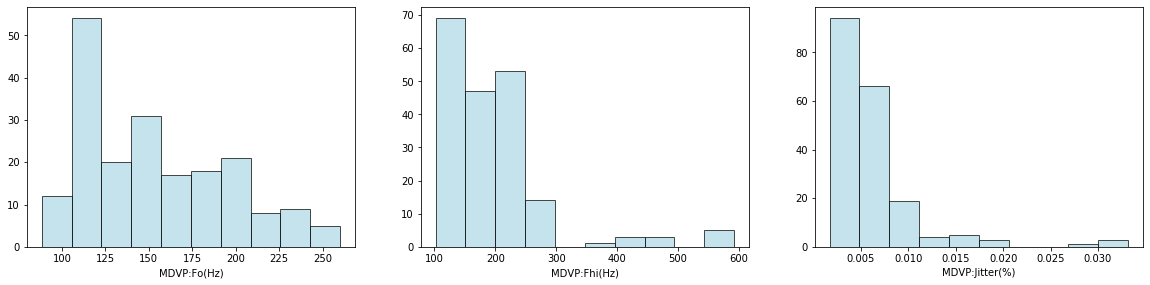

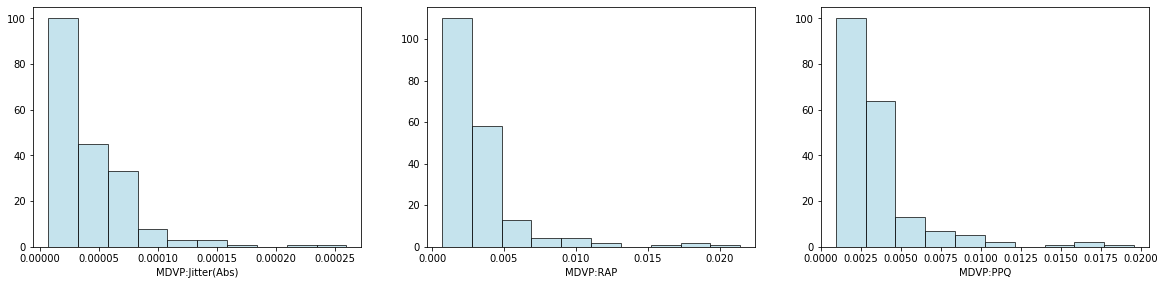

In [370]:
#Plots to see the distribution of the continuous features individually

plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(data["MDVP:Fo(Hz)"], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('MDVP:Fo(Hz)')

plt.subplot(3,3,2)
plt.hist(data["MDVP:Fhi(Hz)"], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('MDVP:Fhi(Hz)')

plt.subplot(3,3,3)
plt.hist(data["MDVP:Jitter(%)"], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('MDVP:Jitter(%)')

plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(data["MDVP:Jitter(Abs)"], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('MDVP:Jitter(Abs)')

plt.subplot(3,3,2)
plt.hist(data["MDVP:RAP"], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('MDVP:RAP')


plt.subplot(3,3,3)
plt.hist(data["MDVP:PPQ"], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('MDVP:PPQ')


plt.show()

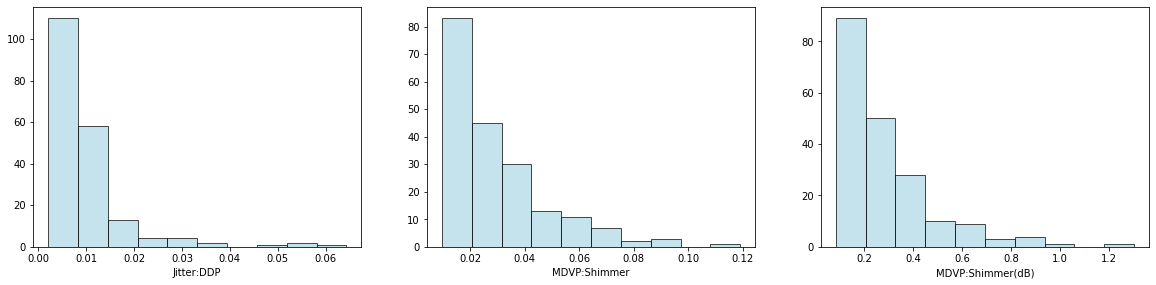

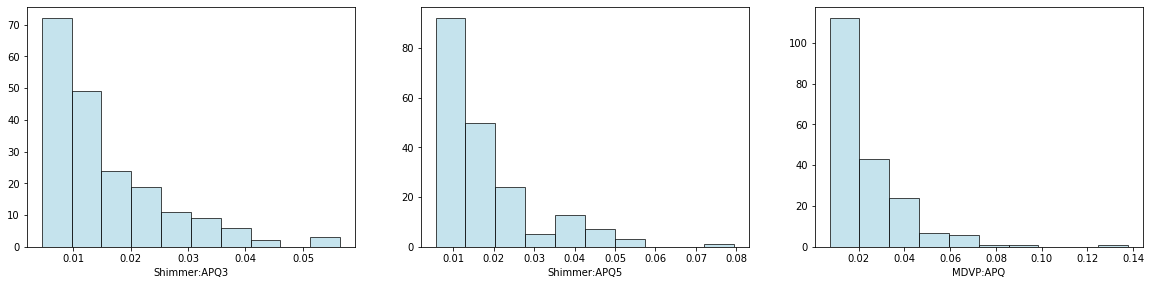

In [371]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(data["Jitter:DDP"], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Jitter:DDP')

plt.subplot(3,3,2)
plt.hist(data["MDVP:Shimmer"], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('MDVP:Shimmer')

plt.subplot(3,3,3)
plt.hist(data["MDVP:Shimmer(dB)"], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('MDVP:Shimmer(dB)')

plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(data["Shimmer:APQ3"], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Shimmer:APQ3')

plt.subplot(3,3,2)
plt.hist(data["Shimmer:APQ5"], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Shimmer:APQ5')


plt.subplot(3,3,3)
plt.hist(data["MDVP:APQ"], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('MDVP:APQ')


plt.show()

Text(0.5, 0, 'Shimmer:DDA')

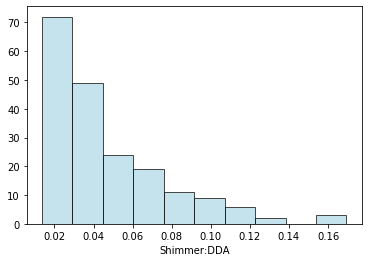

In [372]:
plt.hist(data["Shimmer:DDA"], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Shimmer:DDA')


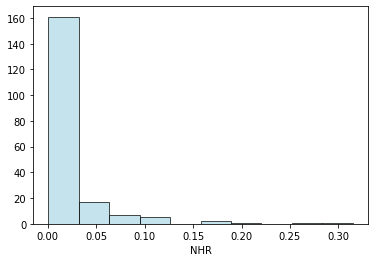

In [373]:
plt.hist(data["NHR"], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('NHR')

plt.show()

<h3><b>We see that data values of majority of attributes are highly skewed.</h3></b>

<h3><b>The spread of majority of the attributes is large and also shows high degree of skewness. </h3></b>

<h3><b>Let's understand it more visually by visualizing its outliers and skewness values. </h3></b>

**Positively skewed:** Most frequent values are low and tail is towards high values.

**Negatively skewed:** Most frequent values are high and tail is towards low values.


If **Mode< Median< Mean** then the distribution is positively skewed.

If **Mode> Median> Mean** then the distribution is negatively skewed.


In [374]:
Skewness = pd.DataFrame({'Skewness' : [stats.skew(data["MDVP:Fo(Hz)"]),stats.skew(data["MDVP:Fhi(Hz)"]),stats.skew(data["MDVP:Jitter(%)"]), stats.skew(data["MDVP:Jitter(Abs)"]),stats.skew(data["MDVP:RAP"]),stats.skew(data["MDVP:PPQ"]), stats.skew(data["Jitter:DDP"])]},
                        index=['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Jitter%', 'MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ', 'Jitter:DDP'])  # Measure the skeweness of the required columns
Skewness

,Skewness
MDVP:Fo(Hz),0.587176
MDVP:Fhi(Hz),2.522549
MDVP:Jitter%,3.061165
MDVP:Jitter(Abs),2.628650
MDVP:RAP,3.334801
MDVP:PPQ,3.050196
Jitter:DDP,3.336141


### We can see skewness of all the attributes as follows :

In [375]:
data.skew()

MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        2.542146
MDVP:Flo(Hz)        1.217350
MDVP:Jitter(%)      3.084946
MDVP:Jitter(Abs)    2.649071
MDVP:RAP            3.360708
MDVP:PPQ            3.073892
Jitter:DDP          3.362058
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
status             -1.187727
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
dtype: float64

<h3><b>We see that most of the attributes are highly skewed, let's see boxplot of some of them to visualize outliers as well.</b></h3>

/Users/sourabhbhavsar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


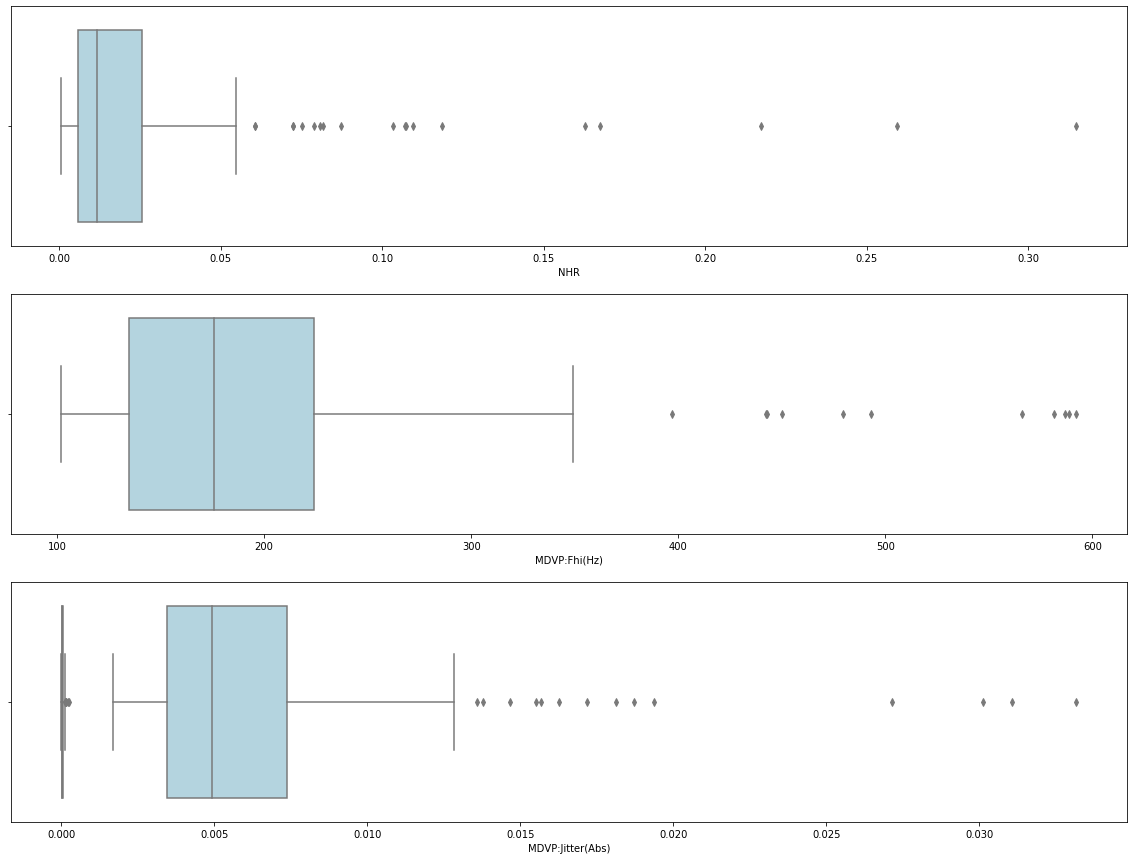

In [376]:
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x= data["NHR"], color='lightblue')

plt.subplot(3,1,2)
sns.boxplot(x= data["MDVP:Fhi(Hz)"], color='lightblue')

plt.subplot(3,1,3)
sns.boxplot(x= data["MDVP:Jitter(%)"], color='lightblue')

plt.subplot(3,1,3)
sns.boxplot(x= data["MDVP:Jitter(Abs)"], color='lightblue')

plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.7 Identify Correlation in the Data:

<h3><b>Its very essential to understand the correlation in the data attributes, since they largely influence the outcome of the model. Also, multicollinearity in the model can lead to sub optimal models. </b> </h3>

In [377]:
data.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


<h3><b>After seeing above correlation matrix, let's also visualize it.</h3></b>

In [378]:
def plot_corr(data, size=18):
    corr = data.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

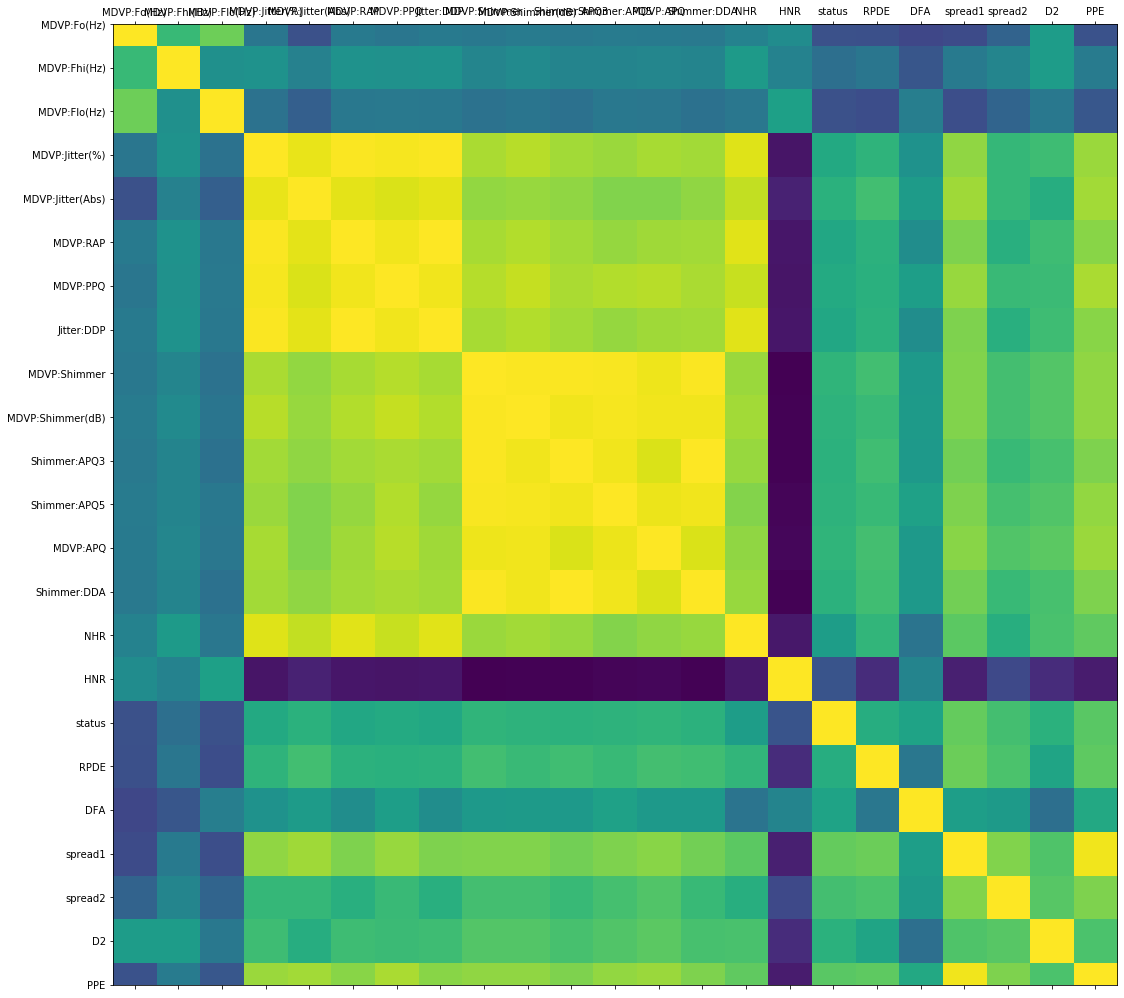

In [379]:
plot_corr(data)

<h3><b><font color="blue"><u>Notable Inferences : </u></font> <br><br> In above plot yellow colour represents maximum correlation and blue colour represents minimum correlation.</h3></b>
<h3><b>From the correlation matrix and also from above plot, we see that <i>MDVP</i> and <i>MDVP:Jitter</i>, <i>MDVP:RAP</i>, <i>MDVP:PPQ</i>, <i>MDVP:Jitter:DDP</i> are highly correlated (Pearson Co-eff 0.99). So we need to consider this owing to multicollinearity which influences the outcome of the model.</b></h3>


    

Also, w.r.t our target variable i.e status, we do not any see notable correlations (ones below -0.5 and ones above +0.5). Only with PPE it has fairly reasonable and positive correlation.

The below catplot also shows that customers who have taken personal loan have income higher than some threshold, also can be inferred as customers having very low income have not responded postively for taking personal loan.

</b></h3>

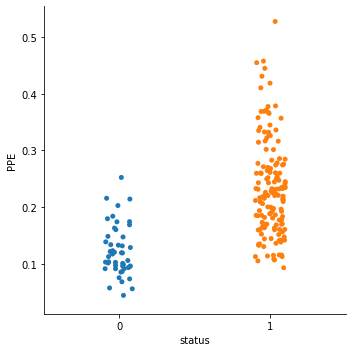

In [380]:
sns.catplot(x="status", y="PPE", order=[0, 1], data=data);

# Bivarite Distribution of the attibutes :

A bivariate analysis among the different variables can be done using scatter matrix plot.

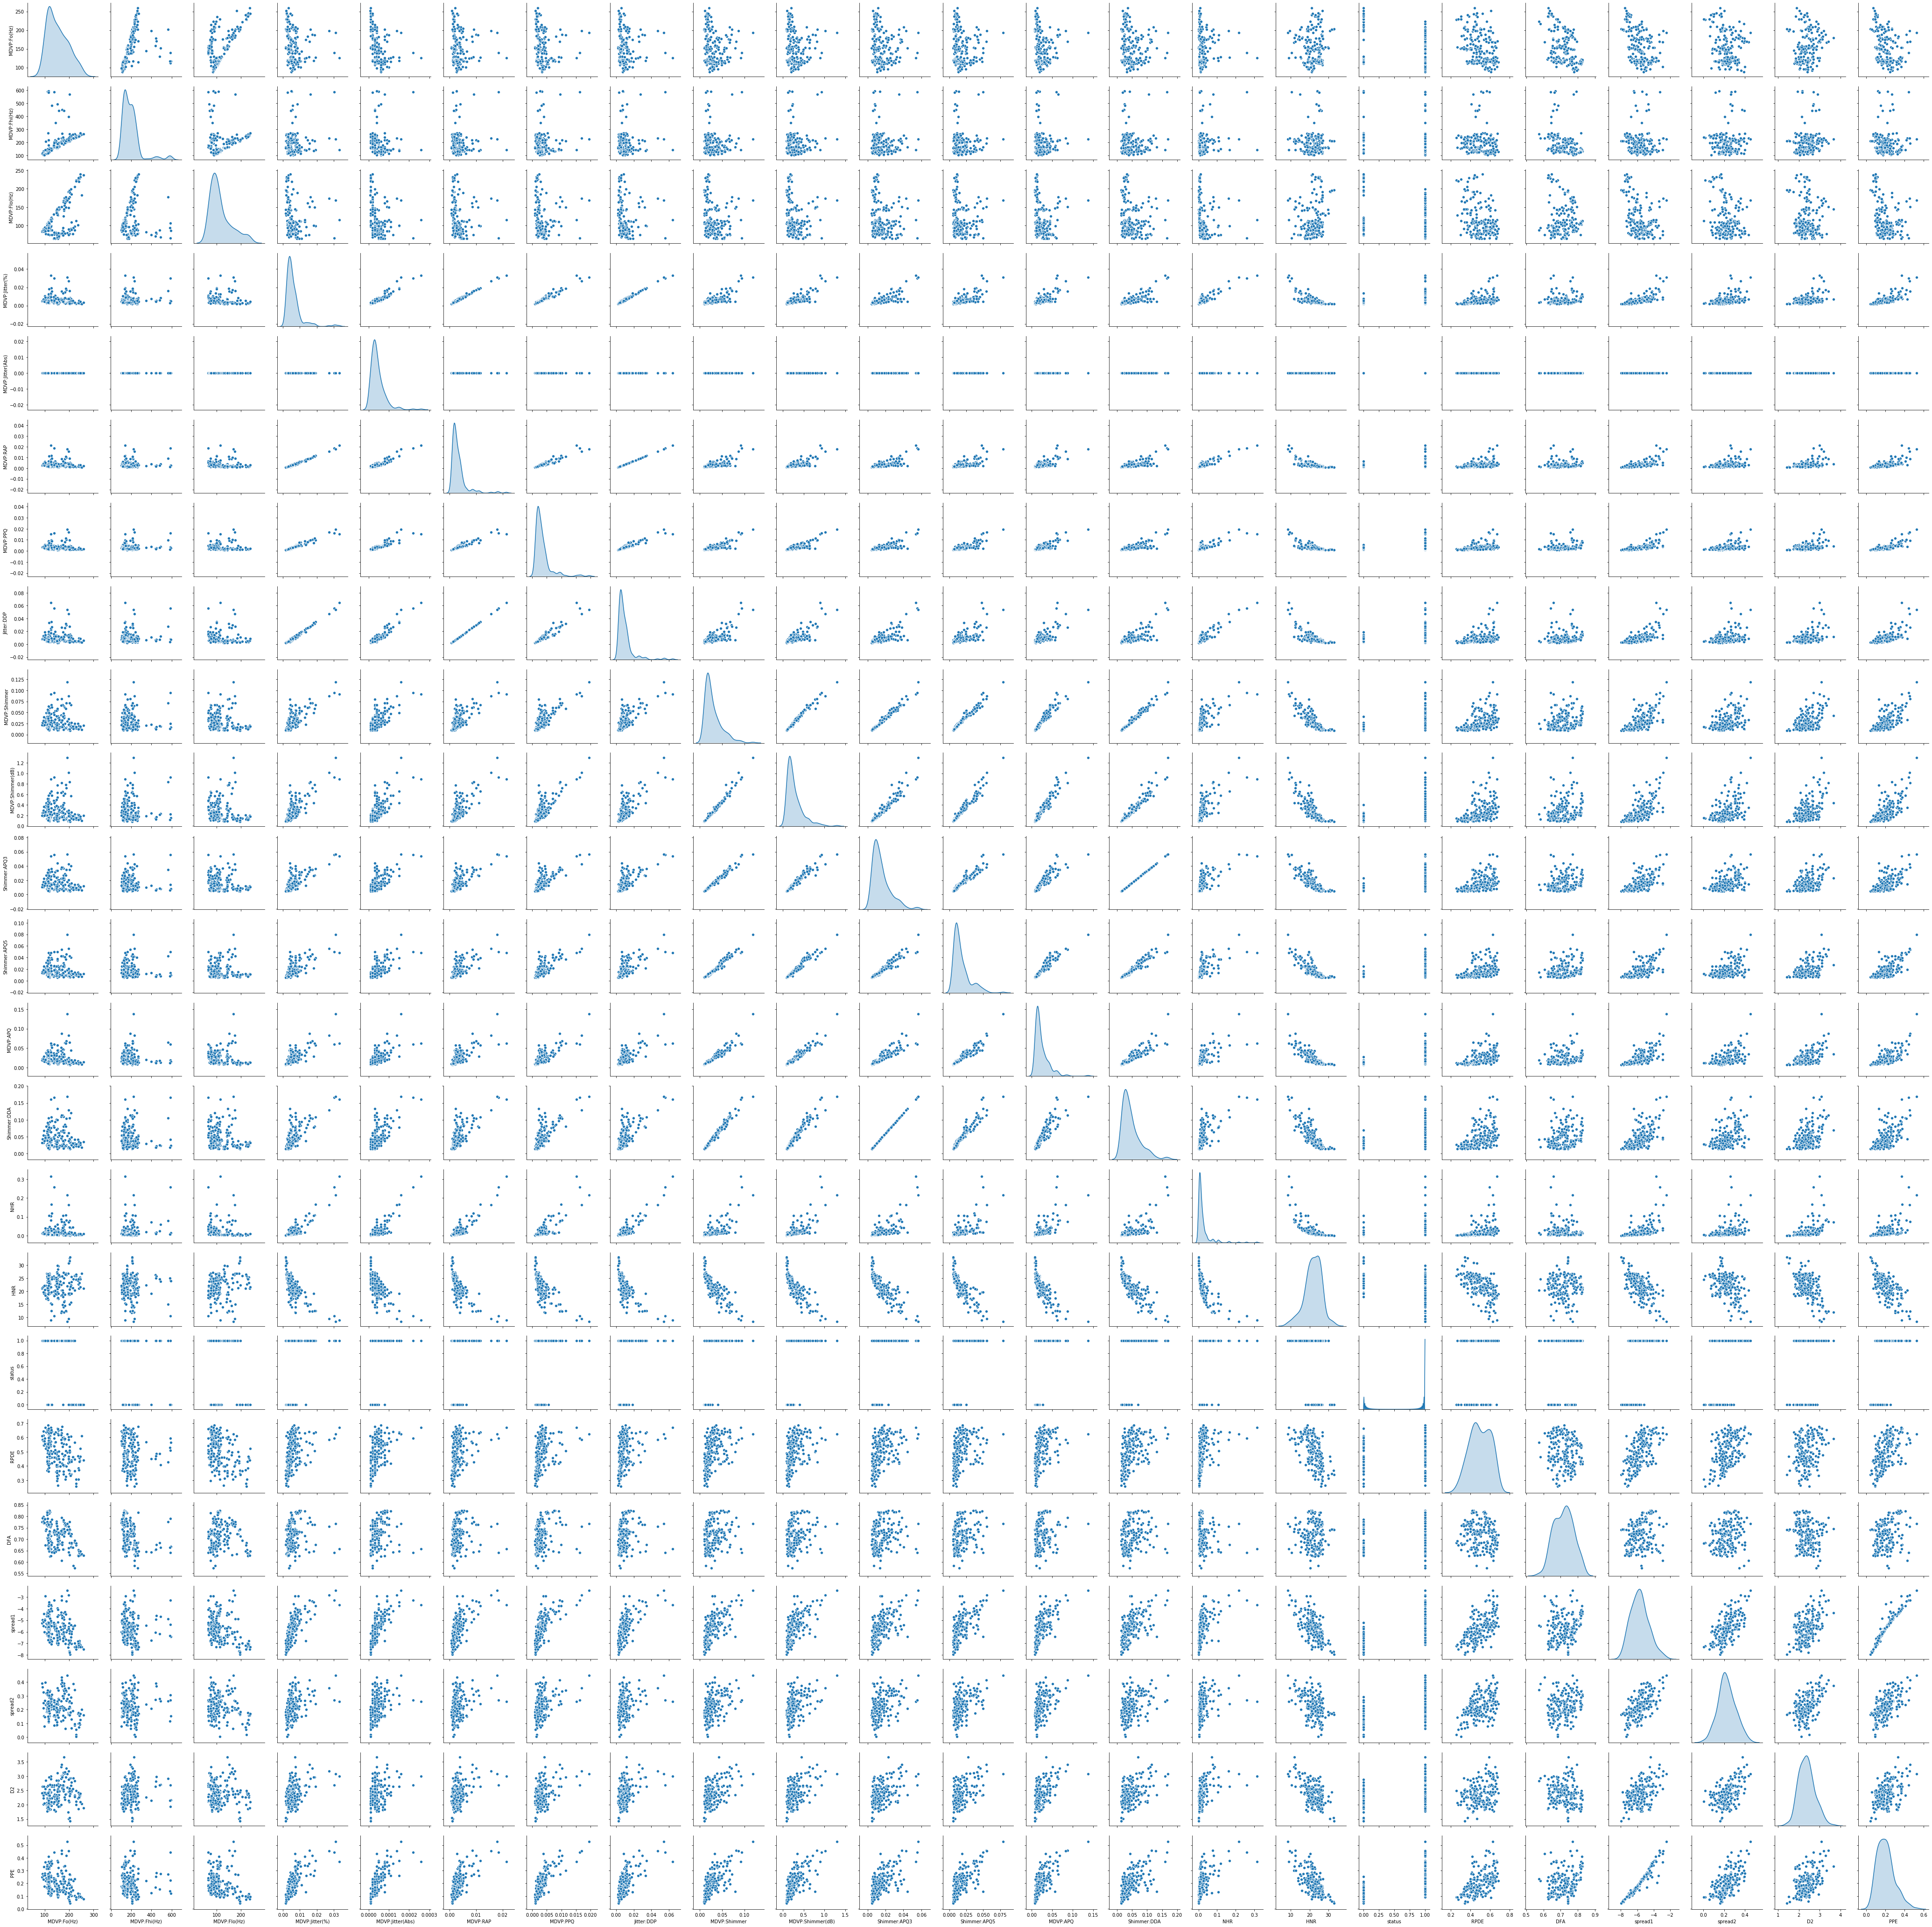

In [381]:
sns.pairplot(data, diag_kind='kde')

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"><u>Notable Observation:</u></span>

<h3><b>
We see that some of the attributes have continuous values in higher range with integer values, while majority of attributes are ranging from 0 to 1, most of them less than zero. Some values and of higher integer values and many of attributes with values very less ranging from negative values to mostly rannging close to 0 and 1. Due to this substantial difference, we need to <b><u>scale the data</u><b>, using min-max or standard scaler. Scaling will remove these differences and all attributes will be on same level/scale while performing of model training. This will not make model biased or cause any impact or much of variance and we can get reliable model outcomes. 
</h3></b>

In [489]:
#from sklearn.preprocessing import MinMaxScaler
# define min max scaler
#sc = MinMaxScaler()
# transform data
#data[['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','HNR','spread1' , 'D2']] = scaler.fit_transform(data[['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','HNR','spread1' , 'D2']])



# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.


#Y = data['status']
#X = data.drop(labels='status',axis=1) 
#data  = data.apply(zscore)  # convert all attributes to Z scale 

#data.describe()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler();
#data[['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','HNR','spread1' , 'D2']] = scaler.fit_transform(data[['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','HNR','spread1' , 'D2']])
data = scaler.fit_transform(data)


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.8 Splitting the data into training and test datasets in the ratio of 70:30 respectively :

In [490]:
from sklearn.model_selection import train_test_split



x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

x_train.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
42,2.010410,0.550328,2.508712,0.00298,0.00001,0.00169,0.00182,0.00507,0.01752,0.164,...,0.01133,0.03104,0.00740,0.192557,0.305062,0.654172,-1.495439,0.098648,0.091698,0.095032
17,0.352423,0.384367,-0.938077,0.00718,0.00004,0.00284,0.00387,0.00853,0.03327,0.348,...,0.03430,0.04322,0.02919,-0.342056,0.631099,0.605417,2.532007,0.434326,1.638581,0.430788
5,-0.815735,-0.722609,-0.058458,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,0.456,...,0.03243,0.06985,0.01222,-0.115072,0.415564,0.825069,1.325656,0.299111,-0.508795,0.357775
120,-0.612556,3.096674,-0.646714,0.00581,0.00005,0.00241,0.00314,0.00723,0.02008,0.221,...,0.01734,0.02548,0.02350,0.647206,0.487756,0.684130,-0.461401,0.279933,0.797279,0.152428
98,-0.688833,-0.619658,-0.463460,0.01378,0.00011,0.00826,0.00655,0.02478,0.04689,0.422,...,0.03908,0.07625,0.10323,-1.461800,0.571010,0.690892,0.483009,0.202146,0.156583,0.260375


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.8 Analysis using Logistic Regression Classification Model :

In [491]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1        2         3         4         5         6  \
0 -0.493883 -0.518894  0.02807  0.001343  0.000007  0.003831  0.002897   

          7         8         9  ...        13        14        15        16  \
0  0.011497  0.070962  0.680481  ...  0.111624 -0.012277 -0.033748  0.342238   

         17       18       19        20        21  intercept  
0  0.901117  1.43138  0.29117  1.162384  0.324441   1.055412  

[1 rows x 23 columns]


In [492]:
model_score_train = model.score(x_train, y_train)
print(model_score_train)

model_score_test = model.score(x_test, y_test)
print(model_score_test)

0.8970588235294118
0.7796610169491526


<h3><b>
Model Accuracy on Training Data = 0.89 <br>
Model Accuracy on Test Data = 0.77
</b></h3>


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.8.1 Confusion Matrix for Logistic Regression Classification Model :

Confusion Matrix : 


Text(0.5, 24.0, 'Actual label')

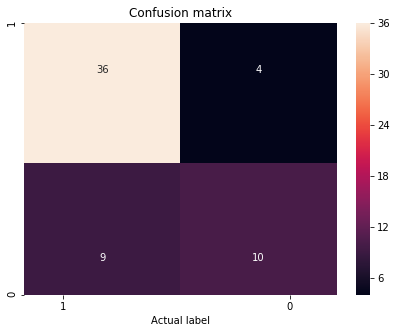

In [493]:
print("Confusion Matrix : ")

cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Parkinson Disease","No Disease"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='d')
plt.xticks([0.25,1.7],labels=[1,0])
plt.yticks([0.25,1.7],labels=[1,0])
plt.title('Confusion matrix')
plt.xlabel('Actual label')

<font color="green"><u>Inferences :</u></font> 

True Positives (TP): we correctly predicted that customers who will buy personal loan : 36

True Negatives (TN): we correctly predicted that customers who will not buy personal loan : 10

False Positives (FP): we incorrectly predicted that customers who will buy personal loan ("Type I error") : 4

False Negatives (FN): we incorrectly predicted that that customers who will not buy personal loan ("Type II error") : 9

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.9 Analysis using KNN :

In [494]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

<h3><b>Build and evaluate K-NN Model : </b></h3>

In [495]:
# loading library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors = 3, weights = 'distance')

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print("Accuracy score with k = 3 is : ",accuracy_score(y_test, y_pred))

# instantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors=5)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print("Accuracy score with k = 5 is : ",accuracy_score(y_test, y_pred))

# instantiate learning model (k = 9)
knn = KNeighborsClassifier(n_neighbors=9)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print("Accuracy score with k = 9 is : ",accuracy_score(y_test, y_pred))

Accuracy score with k = 3 is :  0.8983050847457628
Accuracy score with k = 5 is :  0.864406779661017
Accuracy score with k = 9 is :  0.847457627118644


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.9.1 Confusion Matrix for K-NN :

Confusion Matrix


Text(0.5, 1, 'Confusion matrix')

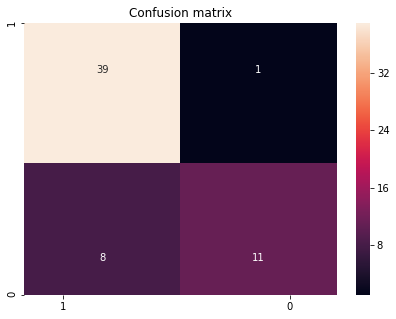

In [455]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in [1,0]],
                  columns = [i for i in ["Parkinson Disease","No Disease"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='d')
plt.xticks([0.25,1.7],labels=[1,0])
plt.yticks([0.25,1.7],labels=[1,0])
plt.title('Confusion matrix')

<h3><b>Cross-validation of K-NN Model : </b></h3> <br>

Running the KNN with no of neighbours to be 1,3,5..19 and finding the optimal number of neighbours from the Misclassification error.

The optimal number of neighbors is 3 since we have min MSE at this point.


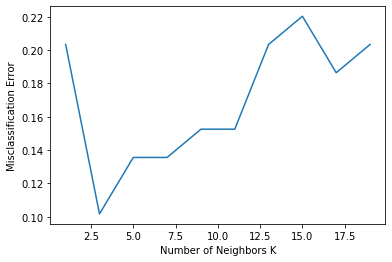

In [456]:
# creating odd list of K for KNN
myList = list(range(1,20))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d since we have min MSE at this point." % optimal_k)


plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.10 Analysis using Naive-Bayes :

In [457]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

x_train.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
42,2.010410,0.550328,2.508712,0.00298,0.00001,0.00169,0.00182,0.00507,0.01752,0.164,...,0.01133,0.03104,0.00740,0.192557,0.305062,0.654172,-1.495439,0.098648,0.091698,0.095032
17,0.352423,0.384367,-0.938077,0.00718,0.00004,0.00284,0.00387,0.00853,0.03327,0.348,...,0.03430,0.04322,0.02919,-0.342056,0.631099,0.605417,2.532007,0.434326,1.638581,0.430788
5,-0.815735,-0.722609,-0.058458,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,0.456,...,0.03243,0.06985,0.01222,-0.115072,0.415564,0.825069,1.325656,0.299111,-0.508795,0.357775
120,-0.612556,3.096674,-0.646714,0.00581,0.00005,0.00241,0.00314,0.00723,0.02008,0.221,...,0.01734,0.02548,0.02350,0.647206,0.487756,0.684130,-0.461401,0.279933,0.797279,0.152428
98,-0.688833,-0.619658,-0.463460,0.01378,0.00011,0.00826,0.00655,0.02478,0.04689,0.422,...,0.03908,0.07625,0.10323,-1.461800,0.571010,0.690892,0.483009,0.202146,0.156583,0.260375


<h3><b>Train Naive-Bayes model : </b></h3>

In [458]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# create the model
loan_model = GaussianNB()

loan_model.fit(x_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

<h3><b>Performance of our model with training data : </b></h3>

In [459]:
loan_train_predict = loan_model.predict(x_train)

from sklearn import metrics

print("Model Accuracy on training data : {0:.4f}".format(metrics.accuracy_score(y_train, loan_train_predict)))
print()

Model Accuracy on training data : 0.7206



<h3><b>Performance of our model with test data : </b></h3>

In [460]:
loan_test_predict = loan_model.predict(x_test)

from sklearn import metrics

print("Model Accuracy on test data : {0:.4f}".format(metrics.accuracy_score(y_test, loan_test_predict)))
print()

Model Accuracy on test data : 0.6780



<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.10.1 Confusion Matrix for Naive-Bayes :

Confusion Matrix


Text(0.5, 1, 'Confusion matrix')

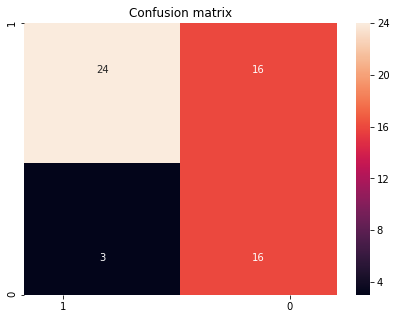

In [461]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, loan_test_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='d')
plt.xticks([0.25,1.7],labels=[1,0])
plt.yticks([0.25,1.7],labels=[1,0])
plt.title('Confusion matrix')

In [462]:
print("Classification Report")
print(metrics.classification_report(y_test, loan_test_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.89      0.60      0.72        40
           0       0.50      0.84      0.63        19

    accuracy                           0.68        59
   macro avg       0.69      0.72      0.67        59
weighted avg       0.76      0.68      0.69        59



<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.11 Analysis using SVM :

In [463]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

x_train.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
42,2.010410,0.550328,2.508712,0.00298,0.00001,0.00169,0.00182,0.00507,0.01752,0.164,...,0.01133,0.03104,0.00740,0.192557,0.305062,0.654172,-1.495439,0.098648,0.091698,0.095032
17,0.352423,0.384367,-0.938077,0.00718,0.00004,0.00284,0.00387,0.00853,0.03327,0.348,...,0.03430,0.04322,0.02919,-0.342056,0.631099,0.605417,2.532007,0.434326,1.638581,0.430788
5,-0.815735,-0.722609,-0.058458,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,0.456,...,0.03243,0.06985,0.01222,-0.115072,0.415564,0.825069,1.325656,0.299111,-0.508795,0.357775
120,-0.612556,3.096674,-0.646714,0.00581,0.00005,0.00241,0.00314,0.00723,0.02008,0.221,...,0.01734,0.02548,0.02350,0.647206,0.487756,0.684130,-0.461401,0.279933,0.797279,0.152428
98,-0.688833,-0.619658,-0.463460,0.01378,0.00011,0.00826,0.00655,0.02478,0.04689,0.422,...,0.03908,0.07625,0.10323,-1.461800,0.571010,0.690892,0.483009,0.202146,0.156583,0.260375


In [464]:
def getAccuracy(testSet, predictions):
	correct = 0
	for x in range(len(testSet)):
		if testSet[x]== predictions[x]:
			correct += 1
	return (correct/float(len(testSet))) * 100.0

In [465]:
clf = svm.SVC(gamma=0.025, C=3)    

#gamma is a measure of influence of a data point. It is inverse of distance of influence. 
#C is penalty of wrong classifications.

In [466]:
clf.fit(X_train , y_train)

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.025, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [467]:
y_pred = clf.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1])

In [468]:
clf.score(x_test, y_test)

0.8305084745762712

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.12 Build Decision Tree : <br>


In [469]:
from sklearn.tree import DecisionTreeClassifier

dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. Other option include 'entropy'.

## Scoring our Decision Tree :

In [470]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

1.0
0.847457627118644


## Visualizing the Decision Tree

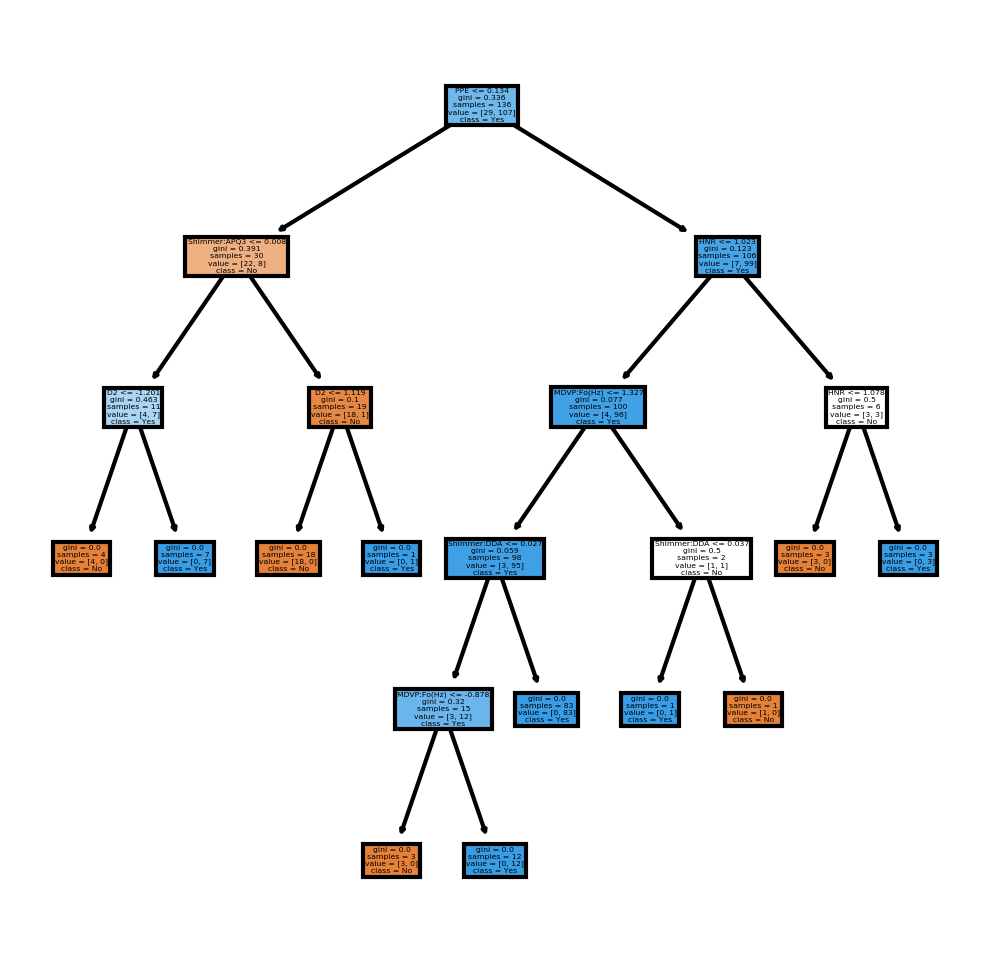

In [471]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fn = list(X_train)
cn = ['No', 'Yes']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(dTree, feature_names = fn, class_names=cn, filled = True)

fig.savefig('tree.png')

## Reducing over fitting (Regularization)

In [472]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.9705882352941176
0.7796610169491526


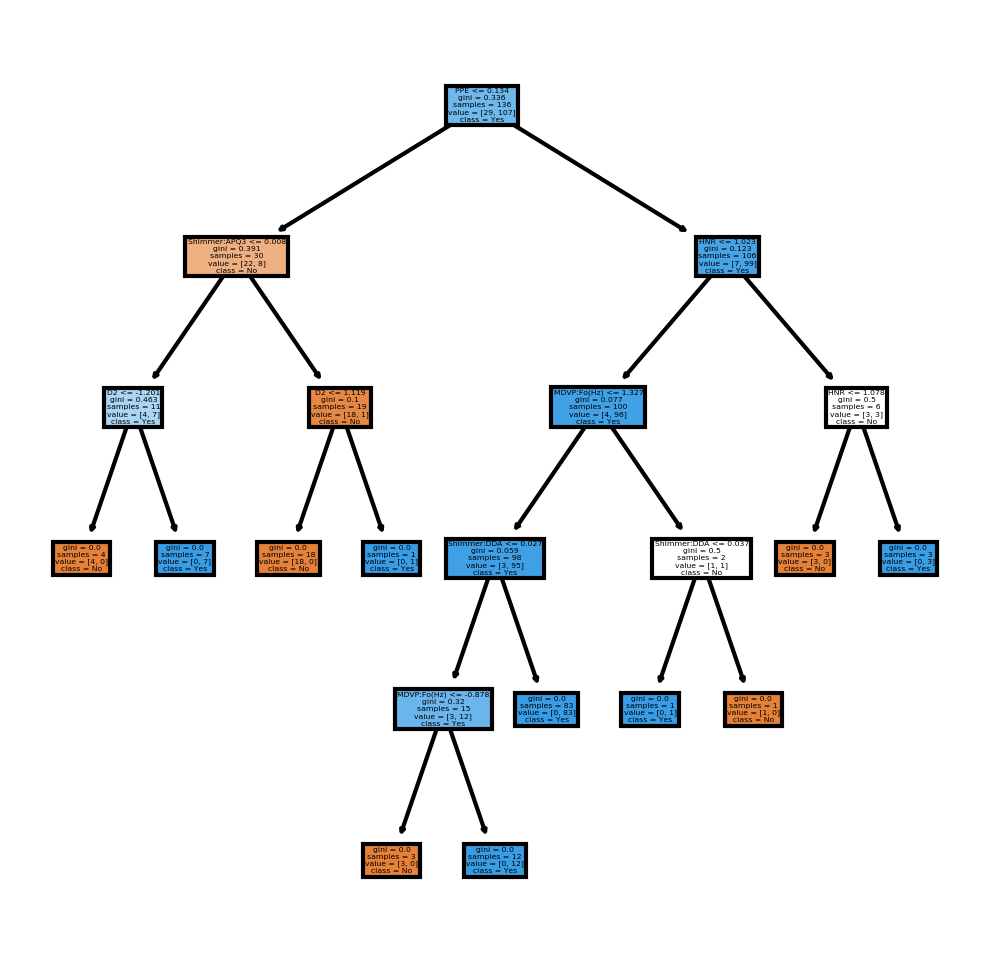

In [473]:
fn = list(X_train)
cn = ['No', 'Yes']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(dTree, feature_names = fn, class_names=cn, filled = True)

fig.savefig('tree.png')

In [474]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = X_train.columns))

                       Imp
MDVP:Fo(Hz)       0.022250
MDVP:Fhi(Hz)      0.000000
MDVP:Flo(Hz)      0.000000
MDVP:Jitter(%)    0.000000
MDVP:Jitter(Abs)  0.000000
MDVP:RAP          0.000000
MDVP:PPQ          0.000000
Jitter:DDP        0.000000
MDVP:Shimmer      0.000000
MDVP:Shimmer(dB)  0.000000
Shimmer:APQ3      0.122313
Shimmer:APQ5      0.000000
MDVP:APQ          0.000000
Shimmer:DDA       0.000000
NHR               0.000000
HNR               0.139001
RPDE              0.000000
DFA               0.000000
spread1           0.000000
spread2           0.000000
D2                0.179968
PPE               0.536468


0.7796610169491526


Text(0.5, 1, 'Confusion matrix')

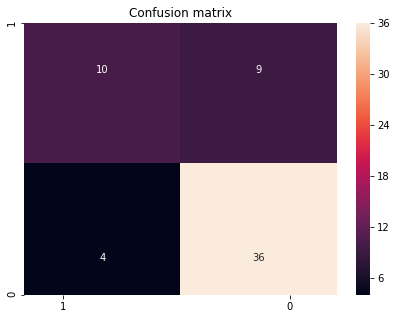

In [475]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

print(dTreeR.score(X_test , y_test))
y_predict = dTreeR.predict(X_test)

cm = confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='d')
plt.xticks([0.25,1.7],labels=[1,0])
plt.yticks([0.25,1.7],labels=[1,0])
plt.title('Confusion matrix')

## Decision Tree using Entropy :

In [476]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. Other option 
# could be gini index.  Restricting the depth of the tree to 5 (no particular reason for selecting this)

#dt_model = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 5, random_state = 100)
                                  
dt_model = DecisionTreeClassifier(criterion = 'entropy' )

In [477]:
dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [478]:
dt_model.score(test_set , test_labels)

1.0

In [479]:
dt_model.score(train_set, train_labels)   
#Overfit due to large complext tree. No training error , poor test performance

1.0

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.13 Ensemble Techniuques : Bagging <br>

In [480]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)

0.8305084745762712


Text(0.5, 1, 'Confusion matrix')

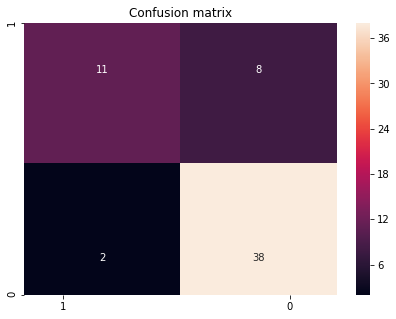

In [481]:
from sklearn.metrics import confusion_matrix

y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.xticks([0.25,1.7],labels=[1,0])
plt.yticks([0.25,1.7],labels=[1,0])
plt.title('Confusion matrix')

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.14 Ensemble Techniques : AdaBoosting <br>


In [482]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(X_train, y_train)

0.8305084745762712


Text(0.5, 1, 'Confusion matrix')

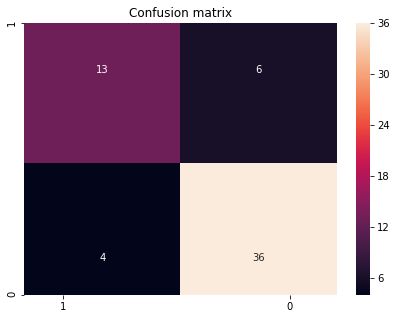

In [483]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))

cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.xticks([0.25,1.7],labels=[1,0])
plt.yticks([0.25,1.7],labels=[1,0])
plt.title('Confusion matrix')

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.14 Ensemble Techniques : Gradient Boosting<br>


In [484]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

0.8813559322033898


Text(0.5, 1, 'Confusion matrix')

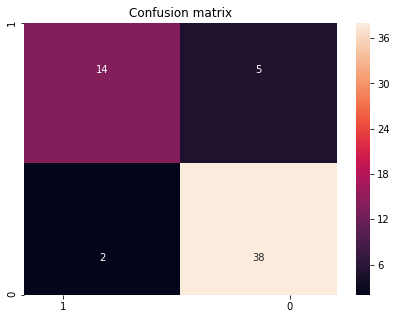

In [485]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))
cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.xticks([0.25,1.7],labels=[1,0])
plt.yticks([0.25,1.7],labels=[1,0])
plt.title('Confusion matrix')


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.15 Ensemble Techniques : Random Forrest<br>


In [486]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)

0.847457627118644


Text(0.5, 1, 'Confusion matrix')

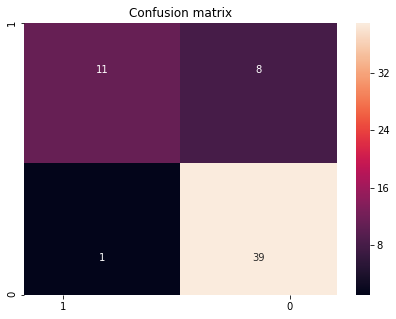

In [487]:
 y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.xticks([0.25,1.7],labels=[1,0])
plt.yticks([0.25,1.7],labels=[1,0])
plt.title('Confusion matrix')

In [488]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier

estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=1)),
    ('svr', make_pipeline(GradientBoostingClassifier(random_state=1)))
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

clf.fit(X_train, y_train).score(X_test, y_test)

ImportError: cannot import name 'StackingClassifier' from 'sklearn.ensemble' (/Users/sourabhbhavsar/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/__init__.py)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.10 Conclusion : <br>




After training and evaluating all three models, we see that <b>KNN (0.89)</b> has <b>highest model accuracy</b>.

Since, a lot of attributes are involved in training data, we also need to consider their co-efficients/weights and what impact they individually also impose on the outcome of the model to verify that model is <b>not biased.</b> <br>

We need to also ensure that the model outcome is not only driven by single attribute while other attributes don't having any impact, also we need to study correlation between attributes to analyse repercussions on the model due to multicollinearity. Also, regularisation of model is essential along with studying the error function of the model.

We will also consider the <b>ROC curve</b> is our case below since we have binary classification. ROC curves are typically used in binary classification to study the output of a classifier. <br>

ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. The “steepness” of ROC curves is also important, since it is ideal to maximize the true positive rate while minimizing the false positive rate.

/Users/sourabhbhavsar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sourabhbhavsar/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Area under curve for model Logistic Regression = 0.713158
Area under curve for model KNN = 0.803289
Area under curve for model Naive Bayes = 0.721053
Area under curve for model Random Forest = 0.817105
Area under curve for model Gradient Boost = 0.817105


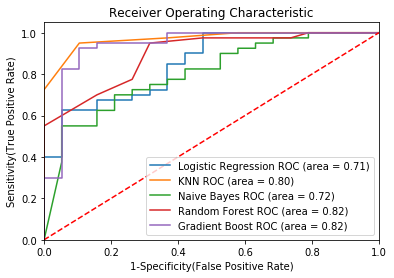

In [431]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(),
},
{
    'label': 'KNN',
    'model': KNeighborsClassifier(),
},
{
    'label': 'Naive Bayes',
    'model': GaussianNB(),
},
  {
    'label': 'Random Forest',
    'model': RandomForestClassifier(),
},
{
    'label': 'Gradient Boost',
    'model': GradientBoostingClassifier(),
}

]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(x_train, y_train) # train the model
    y_pred=model.predict(x_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(x_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(x_test))
    print("Area under curve for model %s = %f" %(m['label'], auc))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

Also, after applying various Ensemble Techniques like Bagging, Boosting, AdaBoosting, Gradient Boosting, Random Forrest, we see that Gradient Boosting increases the model accuracy.<br><br>

Owing to all above factors, we can clearly see that from ROC Curve, Type I, Type II errors and also from Model Accuracy that <b>KNN Model</b> performs the best amongst the other,and <b>Gradient Boosting</b> ensemble techniques increases model accuracy substantially making it a more sound choice in model selection.